# Let's make a 2-layer neural network using just NumPy!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

### Simple binary classification dataset

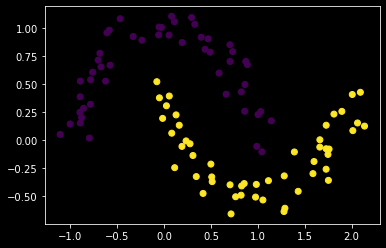

In [2]:
X, Y = make_moons(noise=0.1)
Y = np.expand_dims(Y, 1)
plt.style.use('dark_background')
plt.scatter(X.T[0], X.T[1], c=Y)
plt.show()

### Initialize model parameters

In [3]:
def init_parameters(in_channels, hidden_channels, out_channels):
    W1 = np.random.randn(in_channels, hidden_channels)
    b1 = np.random.randn(hidden_channels)

    W2 = np.random.randn(hidden_channels, out_channels)
    b2 = np.random.randn(out_channels)

    parameters = [W1, b1, W2, b2]

    return parameters

### Activation functions

In [4]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    D = np.copy(Z)
    D[D < 0] = 0
    D[D > 0] = 1

    return D

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    return sigmoid(Z) * (1 - sigmoid(Z))

### Forward pass

In [5]:
def forward(X, parameters, training=False):
    W1, b1, W2, b2 = parameters

    Z1 = X @ W1 + b1
    A1 = relu(Z1)

    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)

    if training:
        cache = [Z1, A1, Z2, A2]

        return A2, cache
    else:
        return A2

### Cost function

In [6]:
def mse(Y, Y_hat):
    N = Y.shape[0]

    return np.sum((Y - Y_hat) ** 2) / N

def mse_derivative(Y, Y_hat):
    return Y_hat - Y

### Point classification accuracy

In [7]:
def acc(Y, Y_hat):
    pred = np.copy(Y_hat)
    pred[pred < 0.5] = 0
    pred[pred >= 0.5] = 1

    return np.sum(Y == pred) / Y.shape[0]

### Backprop

In [8]:
def backward(X, Y, parameters, cache):
    _, _, W2, _ = parameters
    Z1, A1, Z2, A2 = cache

    dA2 = mse_derivative(Y, A2)
    dZ2 = dA2 * sigmoid_derivative(Z2)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_derivative(Z1)

    N = Y.shape[0]

    dW2 = (A1.T @ dZ2) / N
    db2 = np.sum(dZ2, axis=0) / N

    dW1 = (X.T @ dZ1) / N
    db1 = np.sum(dZ1, axis=0) / N

    gradients = [dW1, db1, dW2, db2]

    return gradients

### Visualize output probabilities

In [9]:
def visualize(X, Y, parameters, epoch, loss, accuracy):
    res = 50
    x1, x2 = -1.5, 2.5
    y1, y2 = -1, 1.5
    grid_x, grid_y = np.meshgrid(np.linspace(x1, x2, num=res), np.linspace(y1, y2, num=res))

    grid = np.concatenate((grid_x.reshape((res ** 2, 1)), grid_y.reshape((res ** 2, 1))), axis=1)
    Y_hat = forward(grid, parameters)

    plt.contourf(grid_x, grid_y, Y_hat.reshape(res, res), alpha=0.7)
    plt.scatter(X.T[0], X.T[1], c=Y)
    plt.title(f'epoch {epoch + 1:4d}: loss = {loss:.4f}, accuracy = {accuracy:.4f}')
    plt.savefig(f'./img/epoch_{epoch + 1:04d}.png')
    plt.close()

### Training

In [10]:
def train(X, Y, parameters, n_iterations, alpha):
    Y_hat, cache = forward(X, parameters, training=True)
    
    for epoch in range(n_iterations):
        gradients = backward(X, Y, parameters, cache)
        
        for k in range(len(parameters)):
            parameters[k] -= alpha * gradients[k]

        Y_hat, cache = forward(X, parameters, training=True)
        loss = mse(Y, Y_hat)
        accuracy = acc(Y, Y_hat)
        print(f'epoch {epoch + 1:4d}: loss = {mse(Y, Y_hat):4f}, accuracy = {acc(Y, Y_hat):4f}')

    visualize(X, Y, parameters, epoch, loss, accuracy)

In [11]:
parameters = init_parameters(X.shape[1], 4, Y.shape[1])

train(X, Y, parameters, 10000, 0.1)

epoch    1: loss = 0.489707, accuracy = 0.500000
epoch    2: loss = 0.489597, accuracy = 0.500000
epoch    3: loss = 0.489487, accuracy = 0.500000
epoch    4: loss = 0.489376, accuracy = 0.500000
epoch    5: loss = 0.489264, accuracy = 0.500000
epoch    6: loss = 0.489151, accuracy = 0.500000
epoch    7: loss = 0.489038, accuracy = 0.500000
epoch    8: loss = 0.488923, accuracy = 0.500000
epoch    9: loss = 0.488808, accuracy = 0.500000
epoch   10: loss = 0.488691, accuracy = 0.500000
epoch   11: loss = 0.488574, accuracy = 0.500000
epoch   12: loss = 0.488456, accuracy = 0.500000
epoch   13: loss = 0.488336, accuracy = 0.500000
epoch   14: loss = 0.488216, accuracy = 0.500000
epoch   15: loss = 0.488095, accuracy = 0.500000
epoch   16: loss = 0.487972, accuracy = 0.500000
epoch   17: loss = 0.487849, accuracy = 0.500000
epoch   18: loss = 0.487725, accuracy = 0.500000
epoch   19: loss = 0.487599, accuracy = 0.500000
epoch   20: loss = 0.487471, accuracy = 0.500000
epoch   21: loss = 0

In [12]:
# !convert -delay 1 -loop 0 ./img/*.png class_boundaries.gif

^C
